In [3]:
import os
import tensorflow as tf 
from PIL import Image
import shutil  
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.xlabel('类别')
plt.ylabel('数量')
plt.title('图片数量统计图')
a = plt.subplot(1, 1, 1)

x1 =[40,80,120,160,200,240,280,320,360,400,440,480,520,560,600,640,680,720,760,800,840,880,920,960,1000,1040,1080,1120,1160,1200,1240,1280,1320]
x2 =[45,85,125,165,205,245,285,325,365,405,445,485,525,565,605,645,685,725,765,805,845,885,925,965,1005,1045,1085,1125,1165,1205,1245,1285,1325]

train_tj = {}
validation_tj = {}



cwd = "data/车牌字符识别训练数据/"

classes ={"数字", "字母"}
classesnum = {"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9}
classesletter={"A":10,"B":11,"C":12,"D":13,"E":14,"F":15,"G":16,"H":17,"J":18,"K":19,"L":20,"M":21,"N":22,"P":23,"Q":24,"R":25,"S":26,"T":27,"U":28,"V":29,"W":30,"S":31,"Y":32,"Z":33}

writerv = tf.python_io.TFRecordWriter("validation.tfrecords")
writert = tf.python_io.TFRecordWriter("train.tfrecords")
for index, name in enumerate(classes):
    if name == "数字": 
        for index, i in enumerate(classesnum):
            n = 0  #用于判断数据集分割条件
            train_num = 0
            validation_num = 0
            class_path = cwd + name +"/"+ i + "/"
            dirs = os.listdir(class_path)
            for img_name in dirs:
                n = n + 1
                img_path = class_path + img_name
                img = Image.open(img_path)
                img = img.resize((24, 48))
                img_raw = img.tobytes()              #将图片转化为原生bytes
                example = tf.train.Example(features=tf.train.Features(feature={
                    "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[classesnum[i]])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
                }))
                if n < len(dirs)*0.75:
                    writert.write(example.SerializeToString())#写入train.tfrecords
                    
                    train_num = train_num + 1
                else:
                    writerv.write(example.SerializeToString())  #写入validation.tfrecords
                    validation_num = validation_num + 1
            train_tj[i] = train_num
            validation_tj[i] = validation_num
            
    else:
        for index, i in enumerate(classesletter):
            n = 0
            train_num = 0
            validation_num = 0
            class_path = cwd + name + "/" + i + "/"
            dirs = os.listdir(class_path)
            for img_name in dirs:
                n = n + 1
                img_path = class_path + img_name
                img = Image.open(img_path)
                img = img.resize((24, 48))
                img_raw = img.tobytes()              #将图片转化为原生bytes
                example = tf.train.Example(features=tf.train.Features(feature={
                    "label": tf.train.Feature(int64_list=tf.train.Int64List(value=[classesletter[i]])),
                    'img_raw': tf.train.Feature(bytes_list=tf.train.BytesList(value=[img_raw]))
                }))
                if n<len(dirs)*0.75:   
                    writert.write(example.SerializeToString())
                    train_num = train_num + 1
                else:
                    writerv.write(example.SerializeToString())  #序列化为字符串
                    validation_num = validation_num + 1
            train_tj[i] = train_num
            validation_tj[i] = validation_num

writerv.close()
writert.close()

/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py:73: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding
/home/haiyang/venv/lib/python3.6/site-packages/ipykernel/__main__.py:46: DeprecationWarning: PyUnicode_AsEncodedObject() is deprecated; use PyUnicode_AsEncodedString() to encode from str to bytes or PyCodec_Encode() for generic encoding


In [23]:
#全部图片数量
num = {}
for i in (list(train_tj)):
    num[i] = train_tj[i]+validation_tj[i]
#（全部）q数量，q_1标签 
q_1 = list(num)
q = list()
for i in q_1:
    q.append(num[i])



#统计训练集标签
y_1 = list(train_tj)
#统计验证集标签
y_2 = list(validation_tj)

#将数量提取出来
y1 = list()
y2 = list()
for i in y_1:
    y1.append(train_tj[i])
for i in y_2:
    y2.append(validation_tj[i])
    

In [24]:
#柱状图
def draw_bar(labels,quants):  
    width = 0.5  
    ind = np.linspace(0.35,31,33) 
    # make a square figure  
    fig = plt.figure(1)  
    ax  = fig.add_subplot(111)  
    # Bar Plot  
    ax.bar(ind-width/2,quants,width,color='green')       
    # Set the ticks on x-axis  
    ax.set_xticks(ind)  
    ax.set_xticklabels(labels)  
    # labels  
    ax.set_xlabel('label')  
    ax.set_ylabel('number')  
    # title  
    ax.set_title('Statistical chart', bbox={'facecolor':'0.8', 'pad':5}) 
    
    plt.grid(True)  
    plt.show()  
    plt.savefig("bar.jpg")  
    plt.close()  

全部图片统计


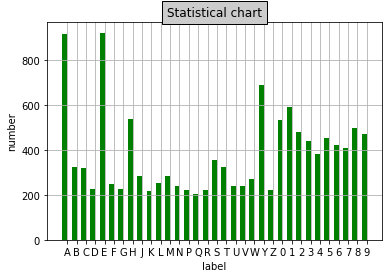

训练集统计


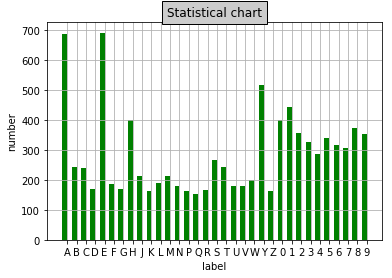

验证集统计


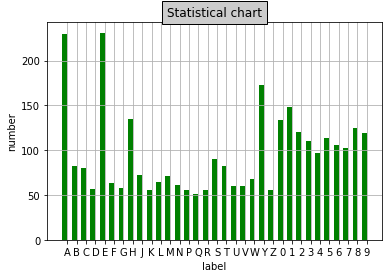

In [26]:
#训练集的统计
print("全部图片统计")
draw_bar(q_1,q)
print("训练集统计")
draw_bar(y_1,y1)
print("验证集统计")
draw_bar(y_2,y2)


In [8]:
#饼状图
def Piechart(y1,y_1):
    plt.axes(aspect=1)  # aspect = 1是圆形，否在是椭圆
    #autopct ，show percet
    plt.pie(x=y1, labels=y_1, explode=None,autopct='%3.1f %%',
            shadow=True, labeldistance=1.1, startangle = 90,pctdistance = 0.6
 
        )
    plt.show()

    #labeldistance，文本的位置离远点有多远，1.1指1.1倍半径的位置
    #autopct，圆里面的文本格式，%3.1f%%表示小数有三位，整数有一位的浮点数
    #shadow，饼是否有阴影
    #startangle，起始角度，0，表示从0开始逆时针转，为第一块。一般选择从90度开始比较好看
    #pctdistance，百分比的text离圆心的距离
    #patches, l_texts, p_texts，为了得到饼图的返回值，p_texts饼图内部文本的，l_texts饼图外label的文本

全部图片统计


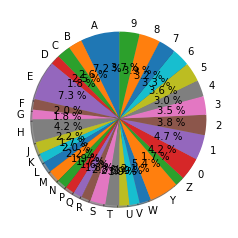

训练集统计


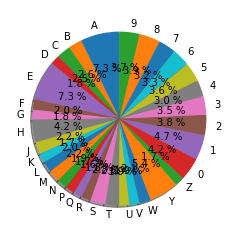

验证集统计


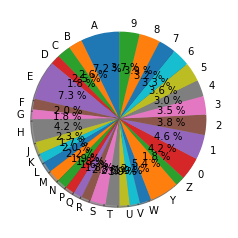

In [27]:
print("全部图片统计")
Piechart(q,q_1)
print("训练集统计")
Piechart(y1,y_1)
print("验证集统计")
Piechart(y2,y_2)

In [34]:
print("   全部图片        训练集        验证集")
for i in num:
    print(i," ",num[i],"          ",train_tj[i],"        ",validation_tj[i])

   全部图片        训练集        验证集
A   918            688          230
B   325            243          82
C   319            239          80
D   226            169          57
E   922            691          231
F   249            186          63
G   228            170          58
H   536            401          135
J   284            212          72
K   219            164          55
L   255            191          64
M   283            212          71
N   240            179          61
P   220            164          56
Q   203            152          51
R   223            167          56
S   356            266          90
T   324            242          82
U   239            179          60
V   239            179          60
W   269            201          68
Y   689            516          173
Z   220            164          56
0   534            400          134
1   591            443          148
2   478            358          120
3   438            328          110
4   384          